In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("airline_delay.csv")

# Preview dataset
df.head()

# Dataset info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,240
arr_del15,443
carrier_ct,240
weather_ct,240


In [4]:
df = df.drop_duplicates()

In [5]:
df = df.fillna(0)

In [6]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

In [7]:
df['total_delay'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay'] + df['late_aircraft_delay']

In [8]:
df.to_csv("cleaned_airline_delay.csv", index=False)

print("Cleaned dataset saved successfully")

Cleaned dataset saved successfully


In [9]:
sns.set(style="whitegrid")

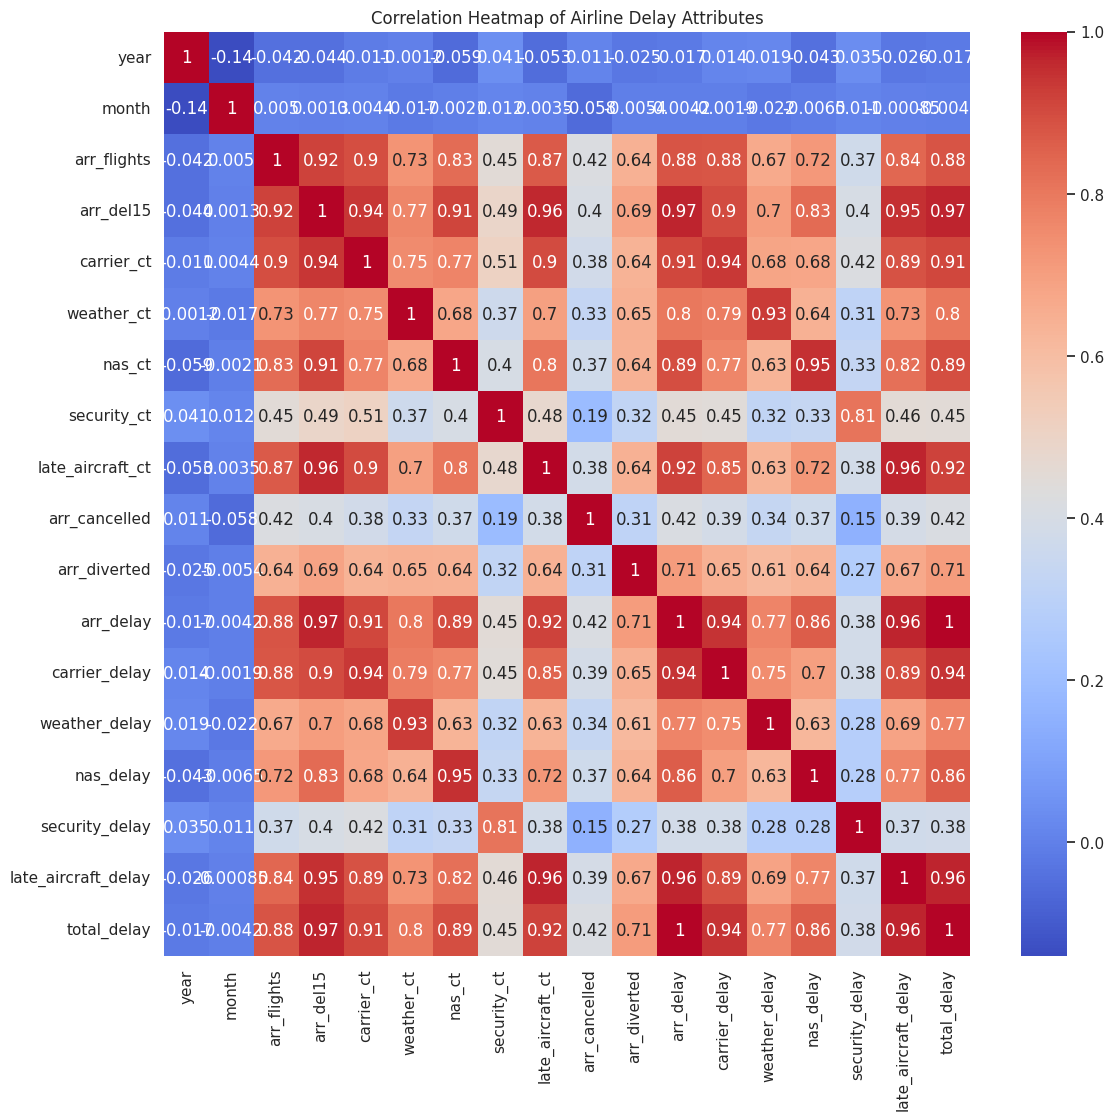

In [14]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Airline Delay Attributes")
plt.show()

In [ ]:
#Correlation Heatmap Insight
#1.The heatmap shows the relationship between different delay attributes.

#2.Carrier delay, weather delay, NAS delay, and late aircraft delay have positive correlations with total delay.

#3.This means when any of these delay factors increases, the overall flight delay also increases.

#4.Among them, late aircraft delay often shows strong correlation, meaning delays from previous flights can significantly affect later flights.

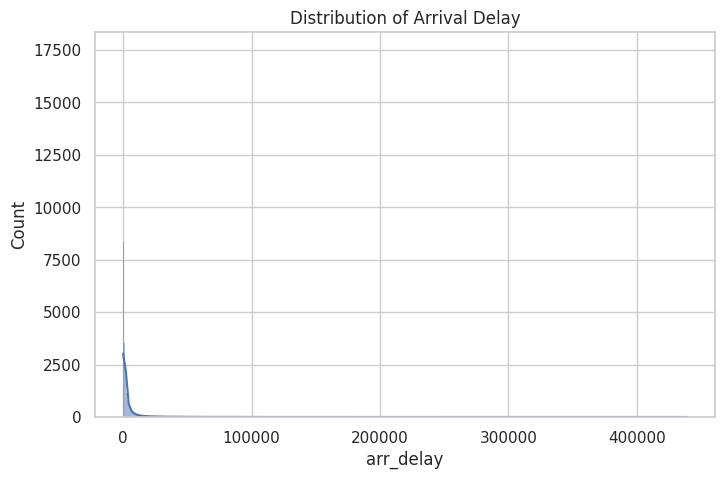

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['arr_delay'], kde=True)
plt.title("Distribution of Arrival Delay")
plt.show()

In [ ]:
#Distribution of Arrival Delay
#1. The distribution shows that most flights have small or moderate delays.

#2. However, there are few flights with extremely large delays, which creates a long tail in the graph.

#3. This indicates that while most flights operate near schedule, rare operational problems or severe weather can cause very large delays.

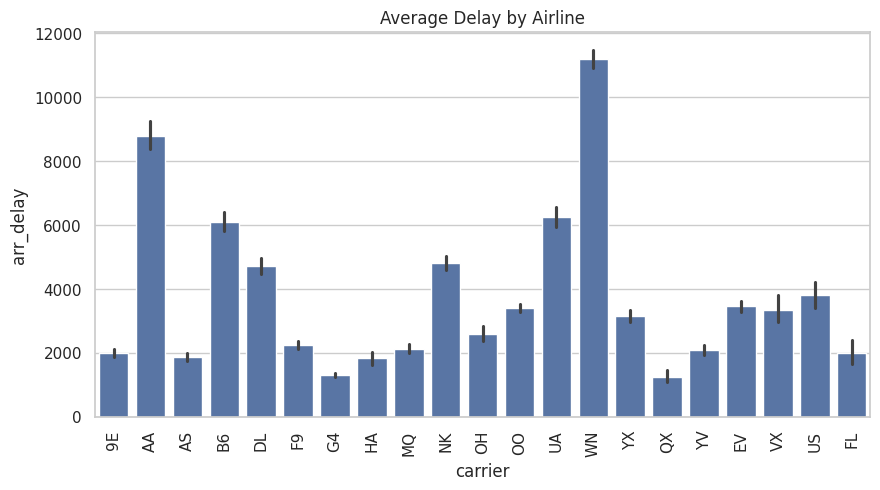

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='carrier', y='arr_delay', data=df)
plt.xticks(rotation=90)
plt.title("Average Delay by Airline")
plt.show()

In [ ]:
#Average Delay by Airline
#1.The bar chart shows that different airlines experience different average delays.

#2.Some airlines consistently have higher average delay times, indicating possible operational inefficiencies.

#3.Airlines with lower delay values may have better scheduling, resource management, or airport coordination.

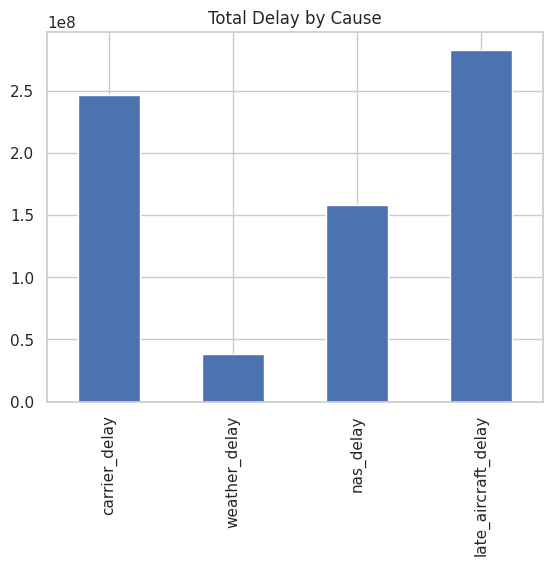

In [16]:
delay_cols = ['carrier_delay','weather_delay','nas_delay','late_aircraft_delay']

df[delay_cols].sum().plot(kind='bar')

plt.title("Total Delay by Cause")
plt.show()

In [ ]:
#Delay Causes Comparison
#1.The graph compares different causes of delays such as:

          #carrier delay

          #weather delay

          #NAS delay

          #late aircraft delay

#2.Late aircraft delay and carrier delay often contribute the most to total delays.

#3.This suggests that delays in earlier flights propagate to later flights in the schedule.

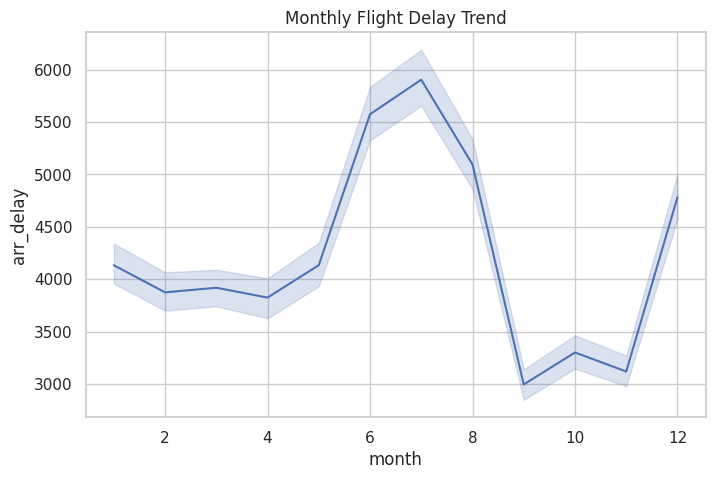

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='arr_delay', data=df)
plt.title("Monthly Flight Delay Trend")
plt.show()

In [ ]:
#Monthly Delay Trend
#1.The monthly trend shows how delays vary across different months.

#2.Some months show higher delay values, which may be due to:

        #seasonal weather conditions

        #increased travel demand

        #airport congestion

#3.This suggests that flight delays are not constant throughout the year.